In [1]:
from google.colab import drive
drive.mount('/content/drive') 
import os
os.chdir("/content/drive/MyDrive/Compet_Kaggle/Space_titanic")

Mounted at /content/drive


In [17]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import missingno

print("Missingno Version : {}".format(missingno.__version__))

Missingno Version : 0.5.1


In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv') 

## Informations datasets

In [14]:
train.dropna().shape,train.shape

((6606, 14), (8693, 14))

In [16]:
train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

Text(0.5, 1.0, 'Barplot des valeurs manquantes par colonnes sur le trainset')

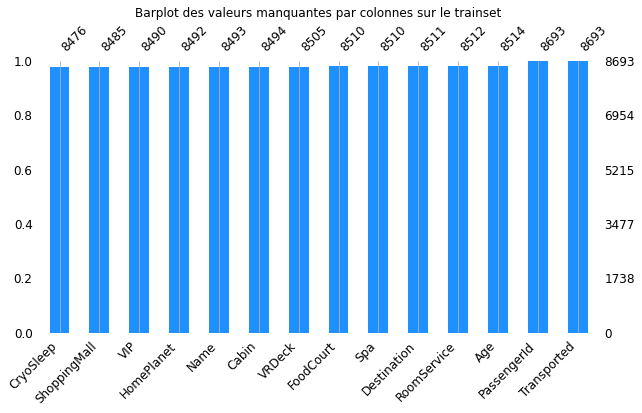

In [22]:
missingno.bar(train,  color="dodgerblue", sort="ascending",figsize=(10,5), fontsize=12)
plt.grid()
plt.title('Barplot des valeurs manquantes par colonnes sur le trainset')


Text(0.5, 1.0, 'Barplot des valeurs manquantes par colonnes sur le testset')

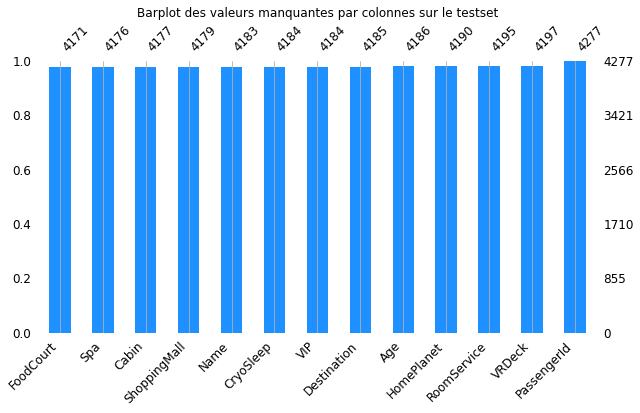

In [23]:
missingno.bar(test,  color="dodgerblue", sort="ascending",figsize=(10,5), fontsize=12)
plt.grid()
plt.title('Barplot des valeurs manquantes par colonnes sur le testset')

In [15]:
test.dropna().shape,test.shape

((3281, 13), (4277, 13))

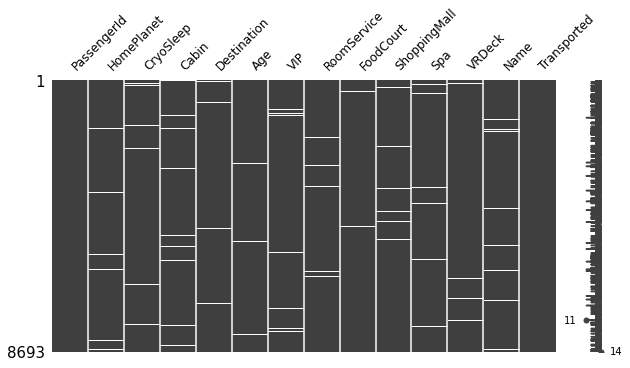

In [26]:
missingno.matrix(train,figsize=(10,5), fontsize=12);


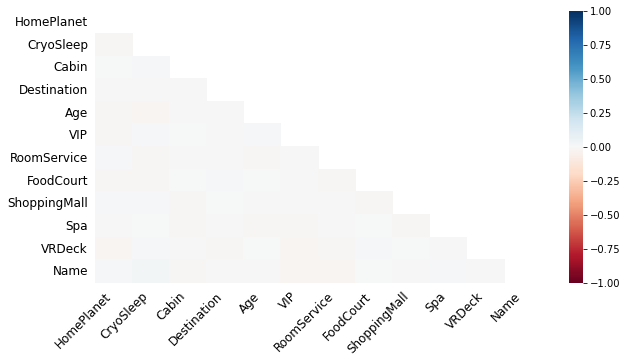

In [27]:
missingno.heatmap(train, figsize=(10,5), fontsize=12)



Compréhension des valeurs de corrélation:

*   -1 - Exact Negative correlation represents that if the value of one variable is present then the value of other variables is definitely absent.
*   0 - No correlation represents that variables' values present or absent do not have any effect on one another.
*   1 - Exact Positive correlation represents that if the value of one variable is present then the value of the other is definitely present.





Source: [Missingno](https://coderzcolumn.com/tutorials/data-science/missingno-visualize-missing-data-in-python)


On peut donc conclure que les valeurs manquantes entre les différentes colonnes

In [8]:
train.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False


In [9]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [15]:
print(f'shape du trainset : {train.shape }')
print(f'shape du test : {test.shape }')

shape du trainset : (8693, 14)
shape du test : (4277, 13)


In [17]:
test.isna().mean().mean(), train.isna().mean().mean()

(0.02008956673441125, 0.019095824226389047)

In [19]:
pd.DataFrame([train.isna().mean(),test.isna().mean()],index=['train columns Nan','Test columns Nan'])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
train columns Nan,0.0,0.023122,0.024963,0.022892,0.020936,0.020591,0.023352,0.020821,0.021051,0.023927,0.021051,0.021627,0.023007,0.0
Test columns Nan,0.0,0.020341,0.021744,0.023381,0.021510,0.021277,0.021744,0.019172,0.024784,0.022913,0.023615,0.018705,0.021978,NaN


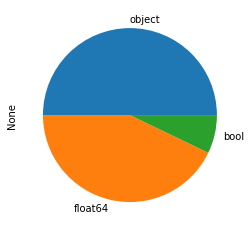

In [5]:
train.dtypes.value_counts().plot(kind='pie') 


On s'interesse à la variable target ici pour dire si les passager ont réussi à être transporté "transported"

In [8]:
train.Transported.mean()

0.5036236051995858

In [9]:
train.Transported.value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

Autant de vivant que de mort

## Analyse univarié et multivarié par rapport à chaque Variables

In [10]:
train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

### HomePlanet

In [13]:
train.HomePlanet.isna().sum()

201

In [14]:
train.HomePlanet.value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

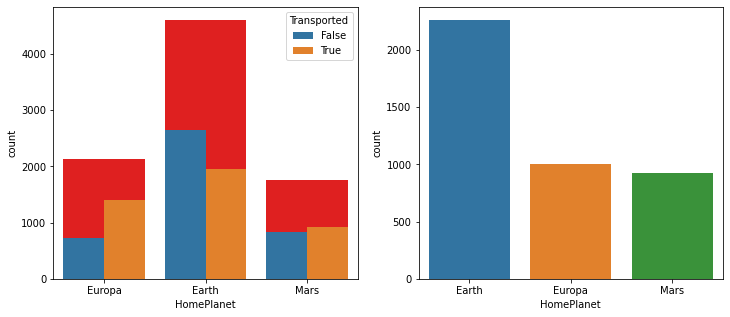

In [27]:
fig, ax = plt.subplots( ncols=2,figsize=(12,5))
sns.countplot(data=train, x="HomePlanet",ax=ax[0],color='red')
sns.countplot(data=train, x="HomePlanet", hue="Transported",ax=ax[0])


sns.countplot(data=test, x="HomePlanet",ax=ax[1])


### Cryosleep

In [29]:
train.CryoSleep.value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [30]:
train.CryoSleep.isna().mean()

0.02496261359714713

Text(0.5, 0.98, 'CryoSleep')

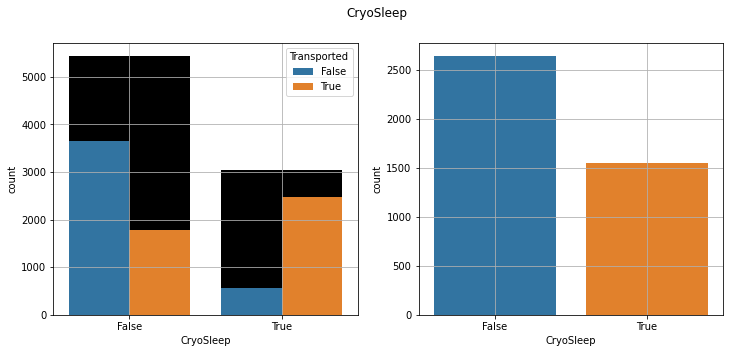

In [39]:
fig, ax = plt.subplots( ncols=2,figsize=(12,5))
sns.countplot(data=train, x="CryoSleep",ax=ax[0],color='black')
sns.countplot(data=train, x="CryoSleep", hue="Transported",ax=ax[0])
ax[0].grid()

sns.countplot(data=test, x="CryoSleep",ax=ax[1])
ax[1].grid()
fig.suptitle('CryoSleep')

### Destination

In [43]:
train.Destination.isna().mean()

0.02093638559760727

In [44]:
train.Destination.value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

Text(0.5, 0.98, 'Destination')

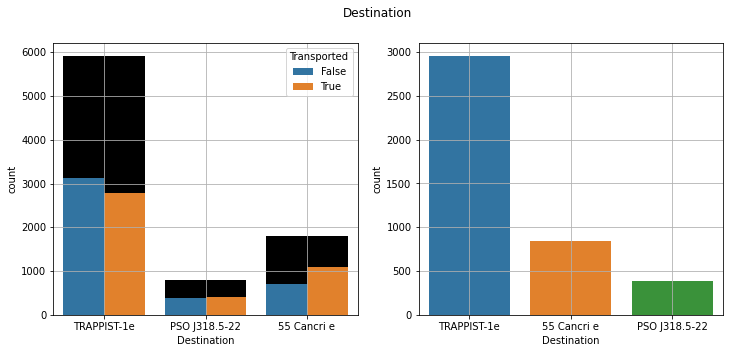

In [45]:
fig, ax = plt.subplots( ncols=2,figsize=(12,5))
sns.countplot(data=train, x="Destination",ax=ax[0],color='black')
sns.countplot(data=train, x="Destination", hue="Transported",ax=ax[0])
ax[0].grid()

sns.countplot(data=test, x="Destination",ax=ax[1])
ax[1].grid()
fig.suptitle('Destination')

### VIP

In [49]:
train.VIP.isna().mean()

0.023352122397331185

In [50]:
train.VIP.value_counts()

False    8291
True      199
Name: VIP, dtype: int64

Text(0.5, 0.98, 'VIP')

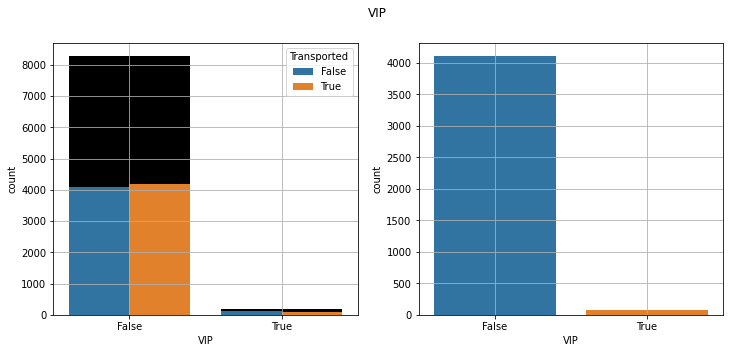

In [51]:
fig, ax = plt.subplots( ncols=2,figsize=(12,5))
sns.countplot(data=train, x="VIP",ax=ax[0],color='black')
sns.countplot(data=train, x="VIP", hue="Transported",ax=ax[0])
ax[0].grid()

sns.countplot(data=test, x="VIP",ax=ax[1])
ax[1].grid()
fig.suptitle('VIP')

In [4]:
train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [8]:
train.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

### Cabin

In [11]:
train.Cabin.isna().mean()

0.02289198205452663

In [30]:
train.Cabin.dropna().apply(lambda x : len(x.split('/')))

0       3
1       3
2       3
3       3
4       3
       ..
8688    3
8689    3
8690    3
8691    3
8692    3
Name: Cabin, Length: 8494, dtype: int64

In [31]:
train.Cabin.head()

0    B/0/P
1    F/0/S
2    A/0/S
3    A/0/S
4    F/1/S
Name: Cabin, dtype: object

In [37]:
def preprocess_cabin(df_):
  df_p = df_.copy()
  df_p['cab1'] = df_.Cabin.apply(lambda x : x.split('/')[0])
  df_p['cab2'] = df_.Cabin.apply(lambda x : x.split('/')[1])
  df_p['cab3'] = df_.Cabin.apply(lambda x : x.split('/')[2])
  df_p.drop('Cabin',axis=1,inplace=True)
  return df_p

In [39]:
df_cab = preprocess_cabin(train.dropna(subset=['Cabin']))

In [42]:
df_cab_test = preprocess_cabin(test.dropna(subset=['Cabin']))

In [41]:
df_cab.cab1.value_counts()

F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: cab1, dtype: int64

In [44]:
df_cab_test.cab1.value_counts()

F    1445
G    1222
E     447
B     362
C     355
D     242
A      98
T       6
Name: cab1, dtype: int64

Text(0.5, 0.98, 'cab1')

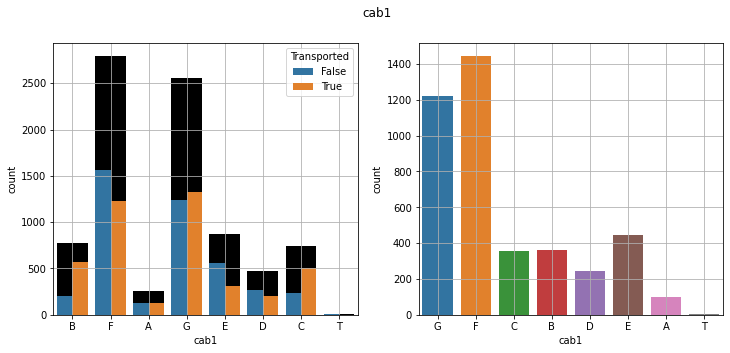

In [45]:
fig, ax = plt.subplots( ncols=2,figsize=(12,5))
sns.countplot(data=df_cab, x="cab1",ax=ax[0],color='black')
sns.countplot(data=df_cab, x="cab1", hue="Transported",ax=ax[0])
ax[0].grid()

sns.countplot(data=df_cab_test, x="cab1",ax=ax[1])
ax[1].grid()
fig.suptitle('cab1')

In [53]:
df_cab = df_cab.astype({'cab2':'int'})

In [64]:
df_cab.Transported=df_cab.Transported.apply(lambda x : 'yes' if x==1 else 'no')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


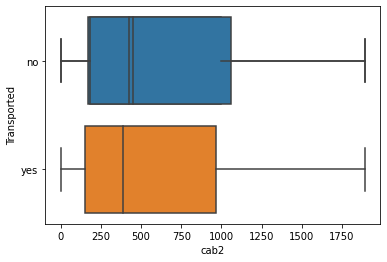

In [66]:
sns.boxplot(df_cab.cab2)
sns.boxplot(data=df_cab,x='cab2',y='Transported')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


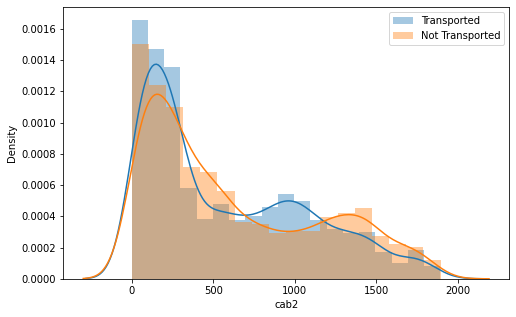

In [72]:
fig, axes = plt.subplots(figsize=(8,5))


sns.distplot(df_cab[df_cab.Transported=='yes'].cab2,label='Transported',ax=axes)
sns.distplot(df_cab[df_cab.Transported=='no'].cab2,label='Not Transported',ax=axes)
axes.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


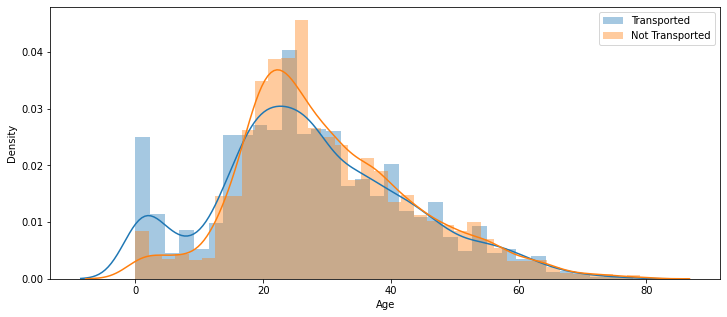

In [83]:
fig, axes = plt.subplots(figsize=(12,5))


sns.distplot(df_cab[df_cab.Transported=='yes'].Age,label='Transported',ax=axes)
sns.distplot(df_cab[df_cab.Transported=='no'].Age,label='Not Transported',ax=axes)
axes.legend()

In [76]:
df_cab.cab3.value_counts()

S    4288
P    4206
Name: cab3, dtype: int64

Text(0.5, 0.98, 'cab3')

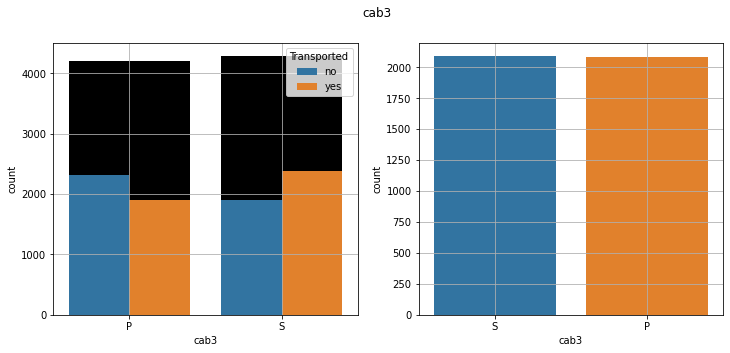

In [77]:
fig, ax = plt.subplots( ncols=2,figsize=(12,5))
sns.countplot(data=df_cab, x="cab3",ax=ax[0],color='black')
sns.countplot(data=df_cab, x="cab3", hue="Transported",ax=ax[0])
ax[0].grid()

sns.countplot(data=df_cab_test, x="cab3",ax=ax[1])
ax[1].grid()
fig.suptitle('cab3')

### Age

In [78]:
train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [80]:
train.Age.describe()

count    8514.000000
mean       28.827930
std        14.489021
min         0.000000
25%        19.000000
50%        27.000000
75%        38.000000
max        79.000000
Name: Age, dtype: float64

In [82]:
train.Age.value_counts()

24.0    324
18.0    320
21.0    311
19.0    293
23.0    292
       ... 
72.0      4
78.0      3
79.0      3
76.0      2
77.0      2
Name: Age, Length: 80, dtype: int64

In [90]:
((train.Age>=12) & (train.Age<18)).sum()

780

In [92]:
((train.Age<12)).sum()

765

In [94]:
def preprocess_age(df_):
  df_p = df_.copy()
  df_p['-12 ans'] = (df_p.Age<12).apply(lambda x :1 if x else 0)
  df_p['Ado'] = ((train.Age>=12) & (train.Age<18)).apply(lambda x :1 if x else 0)
  df_p['-18 ans'] = ((train.Age<18)).apply(lambda x :1 if x else 0)
  df_p['Force_age'] = ((train.Age>=18) & (train.Age<55)).apply(lambda x :1 if x else 0)
  return df_p



In [103]:
df_pre_age= preprocess_age(train)
df_pre_age_test = preprocess_age(test)

Text(0.5, 0.98, '-12 ans')

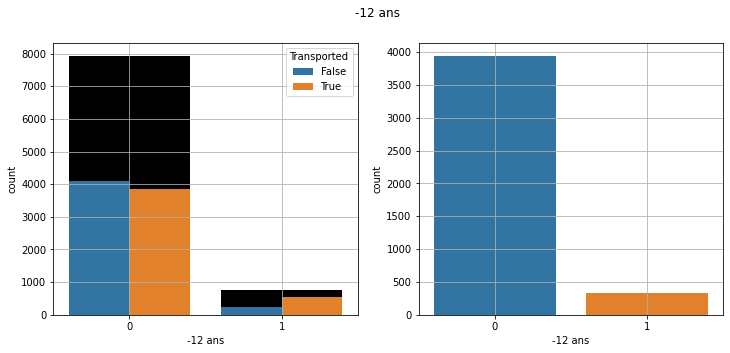

In [104]:
fig, ax = plt.subplots( ncols=2,figsize=(12,5))
sns.countplot(data=df_pre_age, x='-12 ans',ax=ax[0],color='black')
sns.countplot(data=df_pre_age, x='-12 ans', hue="Transported",ax=ax[0])
ax[0].grid()

sns.countplot(data=df_pre_age_test, x='-12 ans',ax=ax[1])
ax[1].grid()
fig.suptitle('-12 ans')

Text(0.5, 0.98, 'Ado')

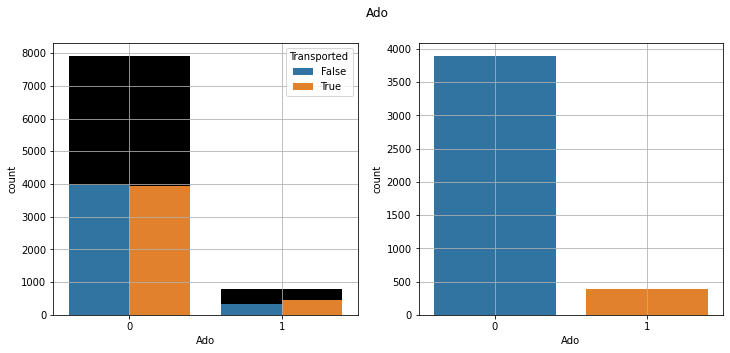

In [105]:
fig, ax = plt.subplots( ncols=2,figsize=(12,5))
sns.countplot(data=df_pre_age, x='Ado',ax=ax[0],color='black')
sns.countplot(data=df_pre_age, x='Ado', hue="Transported",ax=ax[0])
ax[0].grid()

sns.countplot(data=df_pre_age_test, x='Ado',ax=ax[1])
ax[1].grid()
fig.suptitle('Ado')

Text(0.5, 0.98, '-18 ans')

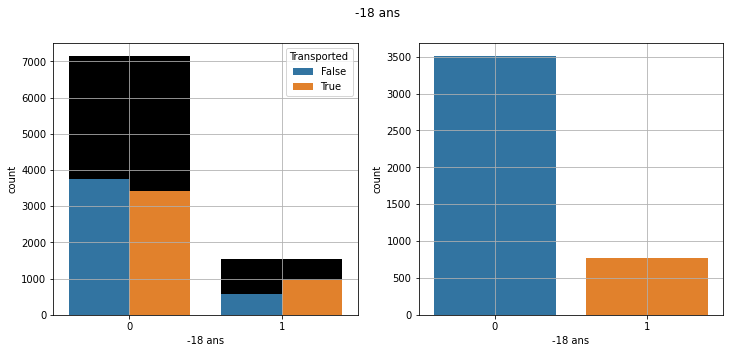

In [107]:
fig, ax = plt.subplots( ncols=2,figsize=(12,5))
sns.countplot(data=df_pre_age, x='-18 ans',ax=ax[0],color='black')
sns.countplot(data=df_pre_age, x='-18 ans', hue="Transported",ax=ax[0])
ax[0].grid()

sns.countplot(data=df_pre_age_test, x='-18 ans',ax=ax[1])
ax[1].grid()
fig.suptitle('-18 ans')

Text(0.5, 0.98, 'Force_age')

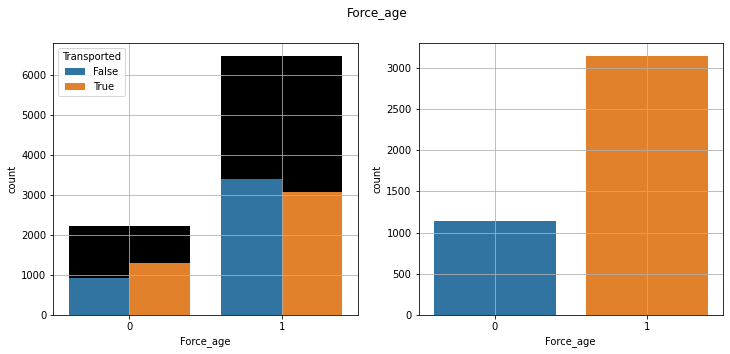

In [108]:
fig, ax = plt.subplots( ncols=2,figsize=(12,5))
sns.countplot(data=df_pre_age, x='Force_age',ax=ax[0],color='black')
sns.countplot(data=df_pre_age, x='Force_age', hue="Transported",ax=ax[0])
ax[0].grid()

sns.countplot(data=df_pre_age_test, x='Force_age',ax=ax[1])
ax[1].grid()
fig.suptitle('Force_age')

### autre

In [109]:
train.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False


In [110]:
feat_float = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']

In [113]:
(train[feat_float]==0).mean()

RoomService     0.641551
FoodCourt       0.627631
ShoppingMall    0.642701
Spa             0.612447
VRDeck          0.632118
dtype: float64

In [116]:
train[feat_float].describe()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,224.687617,458.077203,173.729169,311.138778,304.854791
std,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,47.000000,76.000000,27.000000,59.000000,46.000000
max,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [114]:
train[feat_float]+1

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,1.0,1.0,1.0,1.0,1.0
1,110.0,10.0,26.0,550.0,45.0
2,44.0,3577.0,1.0,6716.0,50.0
3,1.0,1284.0,372.0,3330.0,194.0
4,304.0,71.0,152.0,566.0,3.0
...,...,...,...,...,...
8688,1.0,6820.0,1.0,1644.0,75.0
8689,1.0,1.0,1.0,1.0,1.0
8690,1.0,1.0,1873.0,2.0,1.0
8691,1.0,1050.0,1.0,354.0,3236.0


In [127]:
np.log(train[col].dropna())

0           -inf
1       4.691348
2       3.761200
3           -inf
4       5.713733
          ...   
8688        -inf
8689        -inf
8690        -inf
8691        -inf
8692    4.836282
Name: RoomService, Length: 8512, dtype: float64

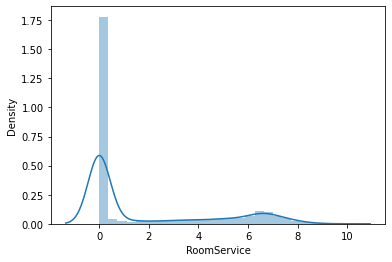

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


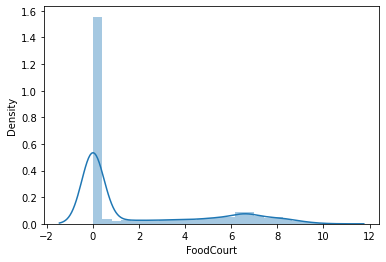

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


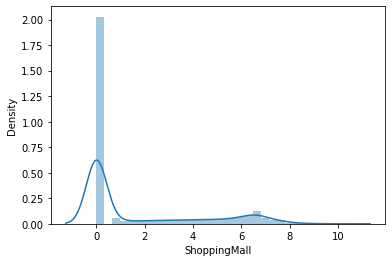

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


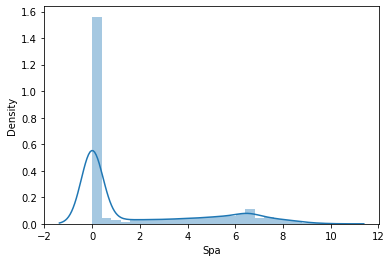

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


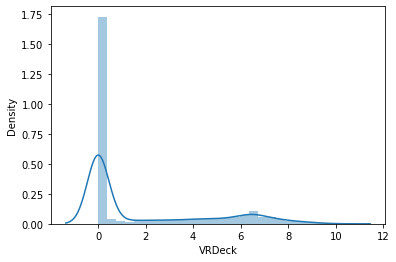

In [128]:
for col in feat_float: 
  lo = train[col].dropna()+1
  sns.distplot(np.log(lo))
  plt.show()

In [129]:
train2 = train.copy()
for col in feat_float:
  train2[col+'_bool'] = (train2[col]==0).apply(lambda x : 0 if x else 1)

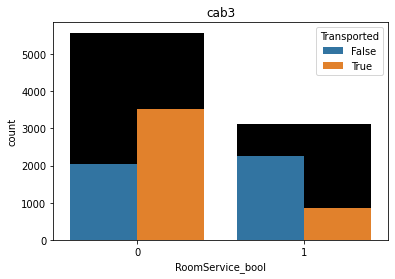

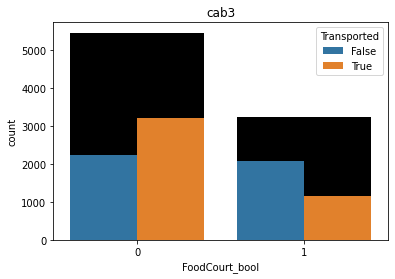

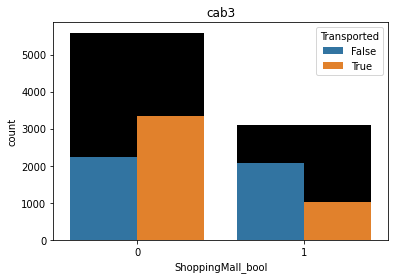

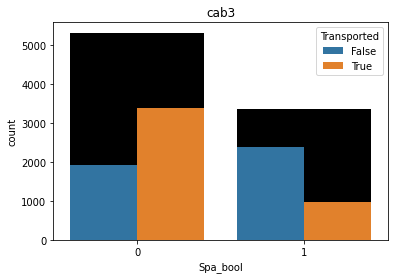

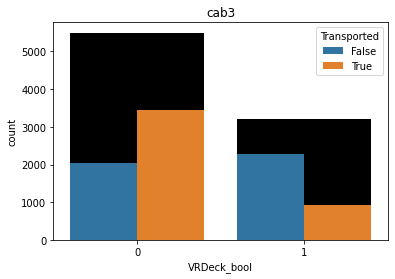

In [132]:
  
for col in [c_+'_bool' for c_ in feat_float]:

  sns.countplot(data=train2, x=col,color='black')
  sns.countplot(data=train2, x=col, hue="Transported")

  plt.title('cab3')
  plt.show()

TypeError: ignored

In [134]:
ser_conso = train[feat_float[0]]
for k in feat_float[1:]:
  ser_conso+= train[k]


In [138]:
train2['conso'] = (ser_conso==0).apply(lambda x : 0 if x else 1)

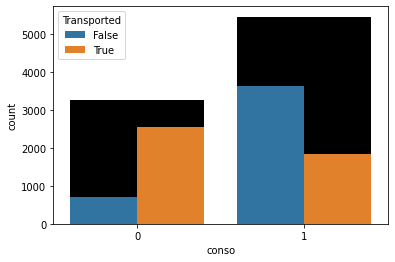

In [140]:
sns.countplot(data=train2, x='conso',color='black')
sns.countplot(data=train2, x='conso', hue="Transported")